In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import datetime
import locale


plt.rcParams['figure.figsize']=(30,20)
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.grid'] = False

# Loading Data
## Load all the data used in the analysis

In [149]:
data = pd.read_csv('C:/Users/ASUS/Documents/GitHub/antam-gold-forecasting/data/harga-emas-antam.csv')
data2 = data.copy()

In [150]:
# Set 'Date' column as index if it's not already in datetime format
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

# Group the data by month and year, and calculate the mean for each group
monthly = data.resample('M').mean()

# Reset the index to have separate columns for year and month
monthly.reset_index(inplace=True)

# Rename the columns
monthly.columns = ['Year-Month', 'Average Gold Price']

# Print the resulting DataFrame
monthly


,Year-Month,Average Gold Price
0,2010-01-31,4.078000e+05
1,2010-02-28,4.026316e+05
2,2010-03-31,3.988095e+05
3,2010-04-30,4.008636e+05
4,2010-05-31,4.200909e+05
...,...,...
167,2023-12-31,1.121345e+06
168,2024-01-31,1.127833e+06
169,2024-02-29,1.132793e+06
170,2024-03-31,1.201548e+06


# Preview Data

In [151]:
monthly.info()
monthly.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year-Month          172 non-null    datetime64[ns]
 1   Average Gold Price  172 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


,count,mean,std,min,25%,50%,75%,max
Average Gold Price,172.0,705153.624694,207730.530317,398809.52381,565197.894737,614854.166667,929093.103448,1.311231e+06


## Visualize Data Trendline 

In [162]:
fig = px.line(monthly, x='Year-Month', y='Average Gold Price', title='Gold Price Time Series')
fig.update_xaxes(rangeslider_visible=True)

# Format y-axis ticks as currency
locale.setlocale(locale.LC_NUMERIC, 'id_ID')
fig.update_yaxes(tickprefix='Rp')

# Set the height and width of the chart
fig.update_layout(height=600, width=1000)

# Center-align the title
fig.update_layout(title_x=0.5)

fig.show()

# Checking Time Series Parameters

## Checking Seasonality

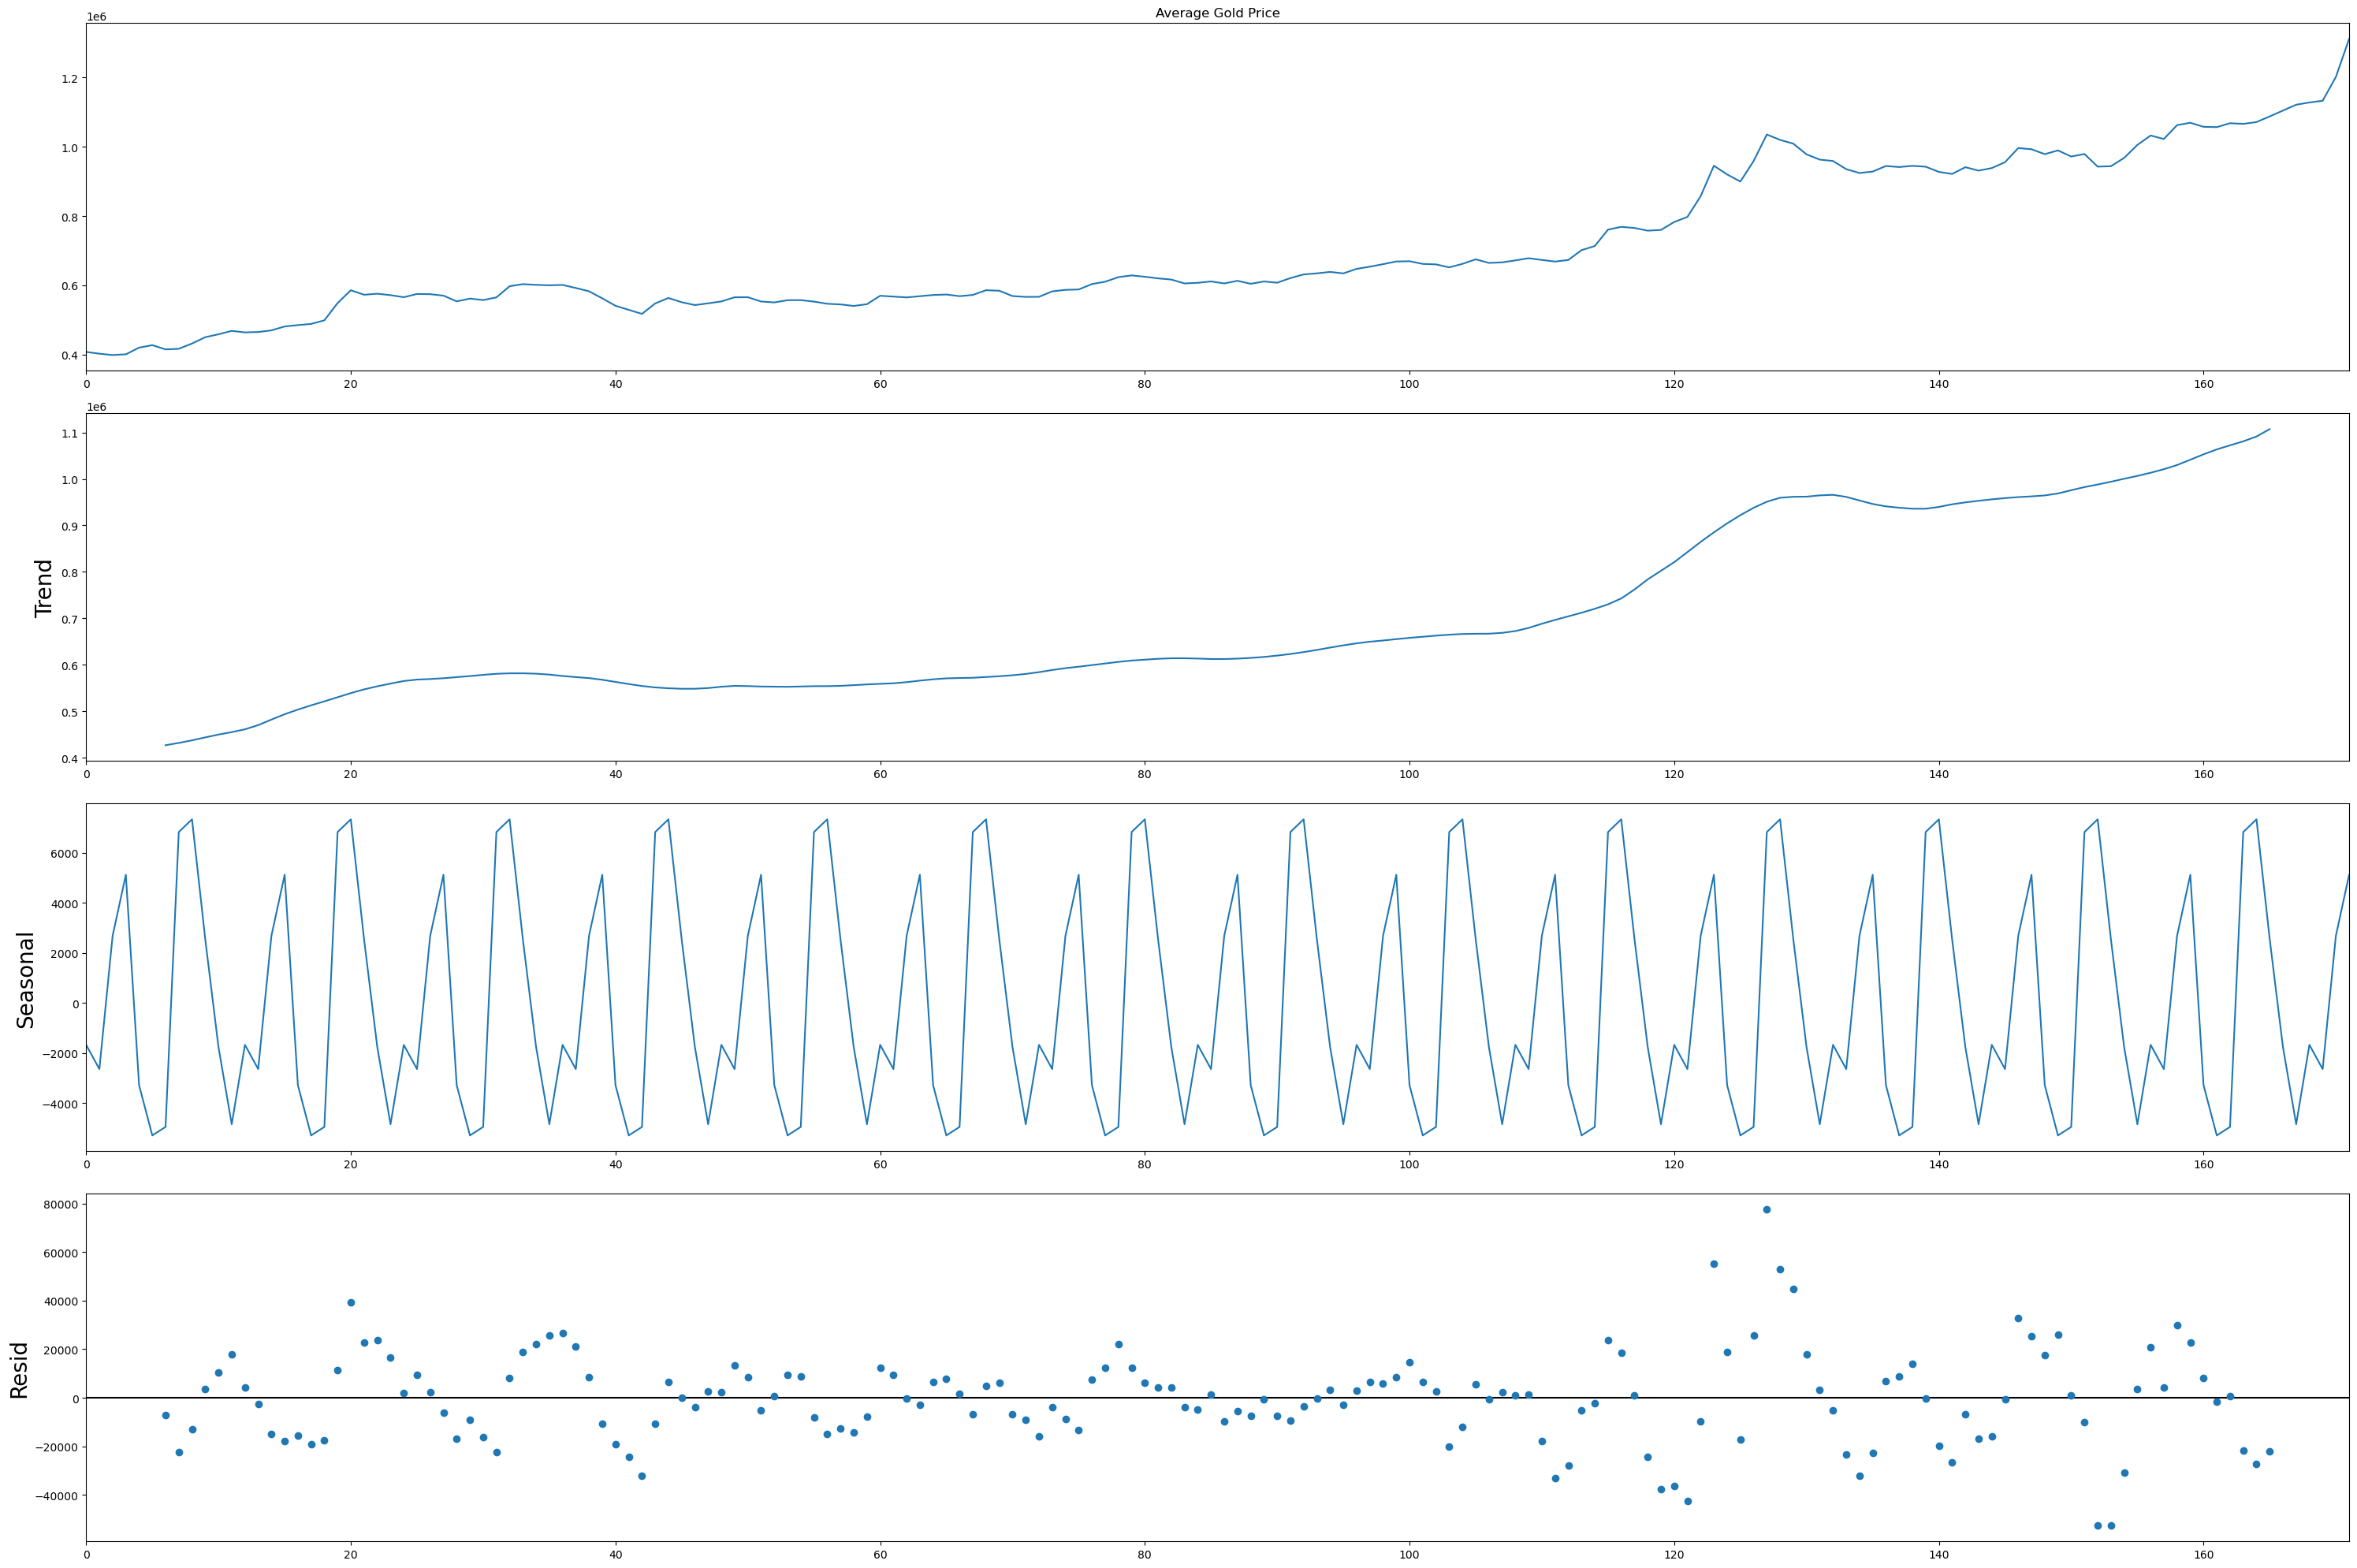

In [154]:
#Decompose
decomposition = seasonal_decompose(monthly['Average Gold Price'], model='additive', period=12)
decomposition.plot()
plt.show()

In [155]:
# lets create time series from goldprice 
timeSeries = monthly.loc[:, ["Year-Month","Average Gold Price"]]
timeSeries.index = timeSeries['Year-Month']
ts = timeSeries.drop("Year-Month",axis=1)
ts

,Average Gold Price
Year-Month,
2010-01-31,4.078000e+05
2010-02-28,4.026316e+05
2010-03-31,3.988095e+05
2010-04-30,4.008636e+05
2010-05-31,4.200909e+05
...,...
2023-12-31,1.121345e+06
2024-01-31,1.127833e+06
2024-02-29,1.132793e+06


In [156]:
# using first order differencing (detrending)
first_ord_diff = ts.diff().dropna()

# using second order differencing
second_ord_diff = ts.diff().diff().dropna()

# differencing to remove seasonality
diseasonalize = ts.diff(12).dropna()

# using rolling mean 
rolling_mean = ts.rolling(window=12).mean()
subt_roll_mean = ts - rolling_mean

# log transform
log_transform = np.log(ts)

# Square root transform
square_root = np.sqrt(ts)

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(ts)
sd_detrend = (decomp.observed - decomp.trend)

# using hp_filter 
cyclic_extract, trend = hpfilter(ts)

# combine the methods into a list
methods = [first_ord_diff, second_ord_diff, 
           diseasonalize, subt_roll_mean, 
           log_transform, square_root,
           sd_detrend, cyclic_extract]

Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)
Figure(3000x2000)


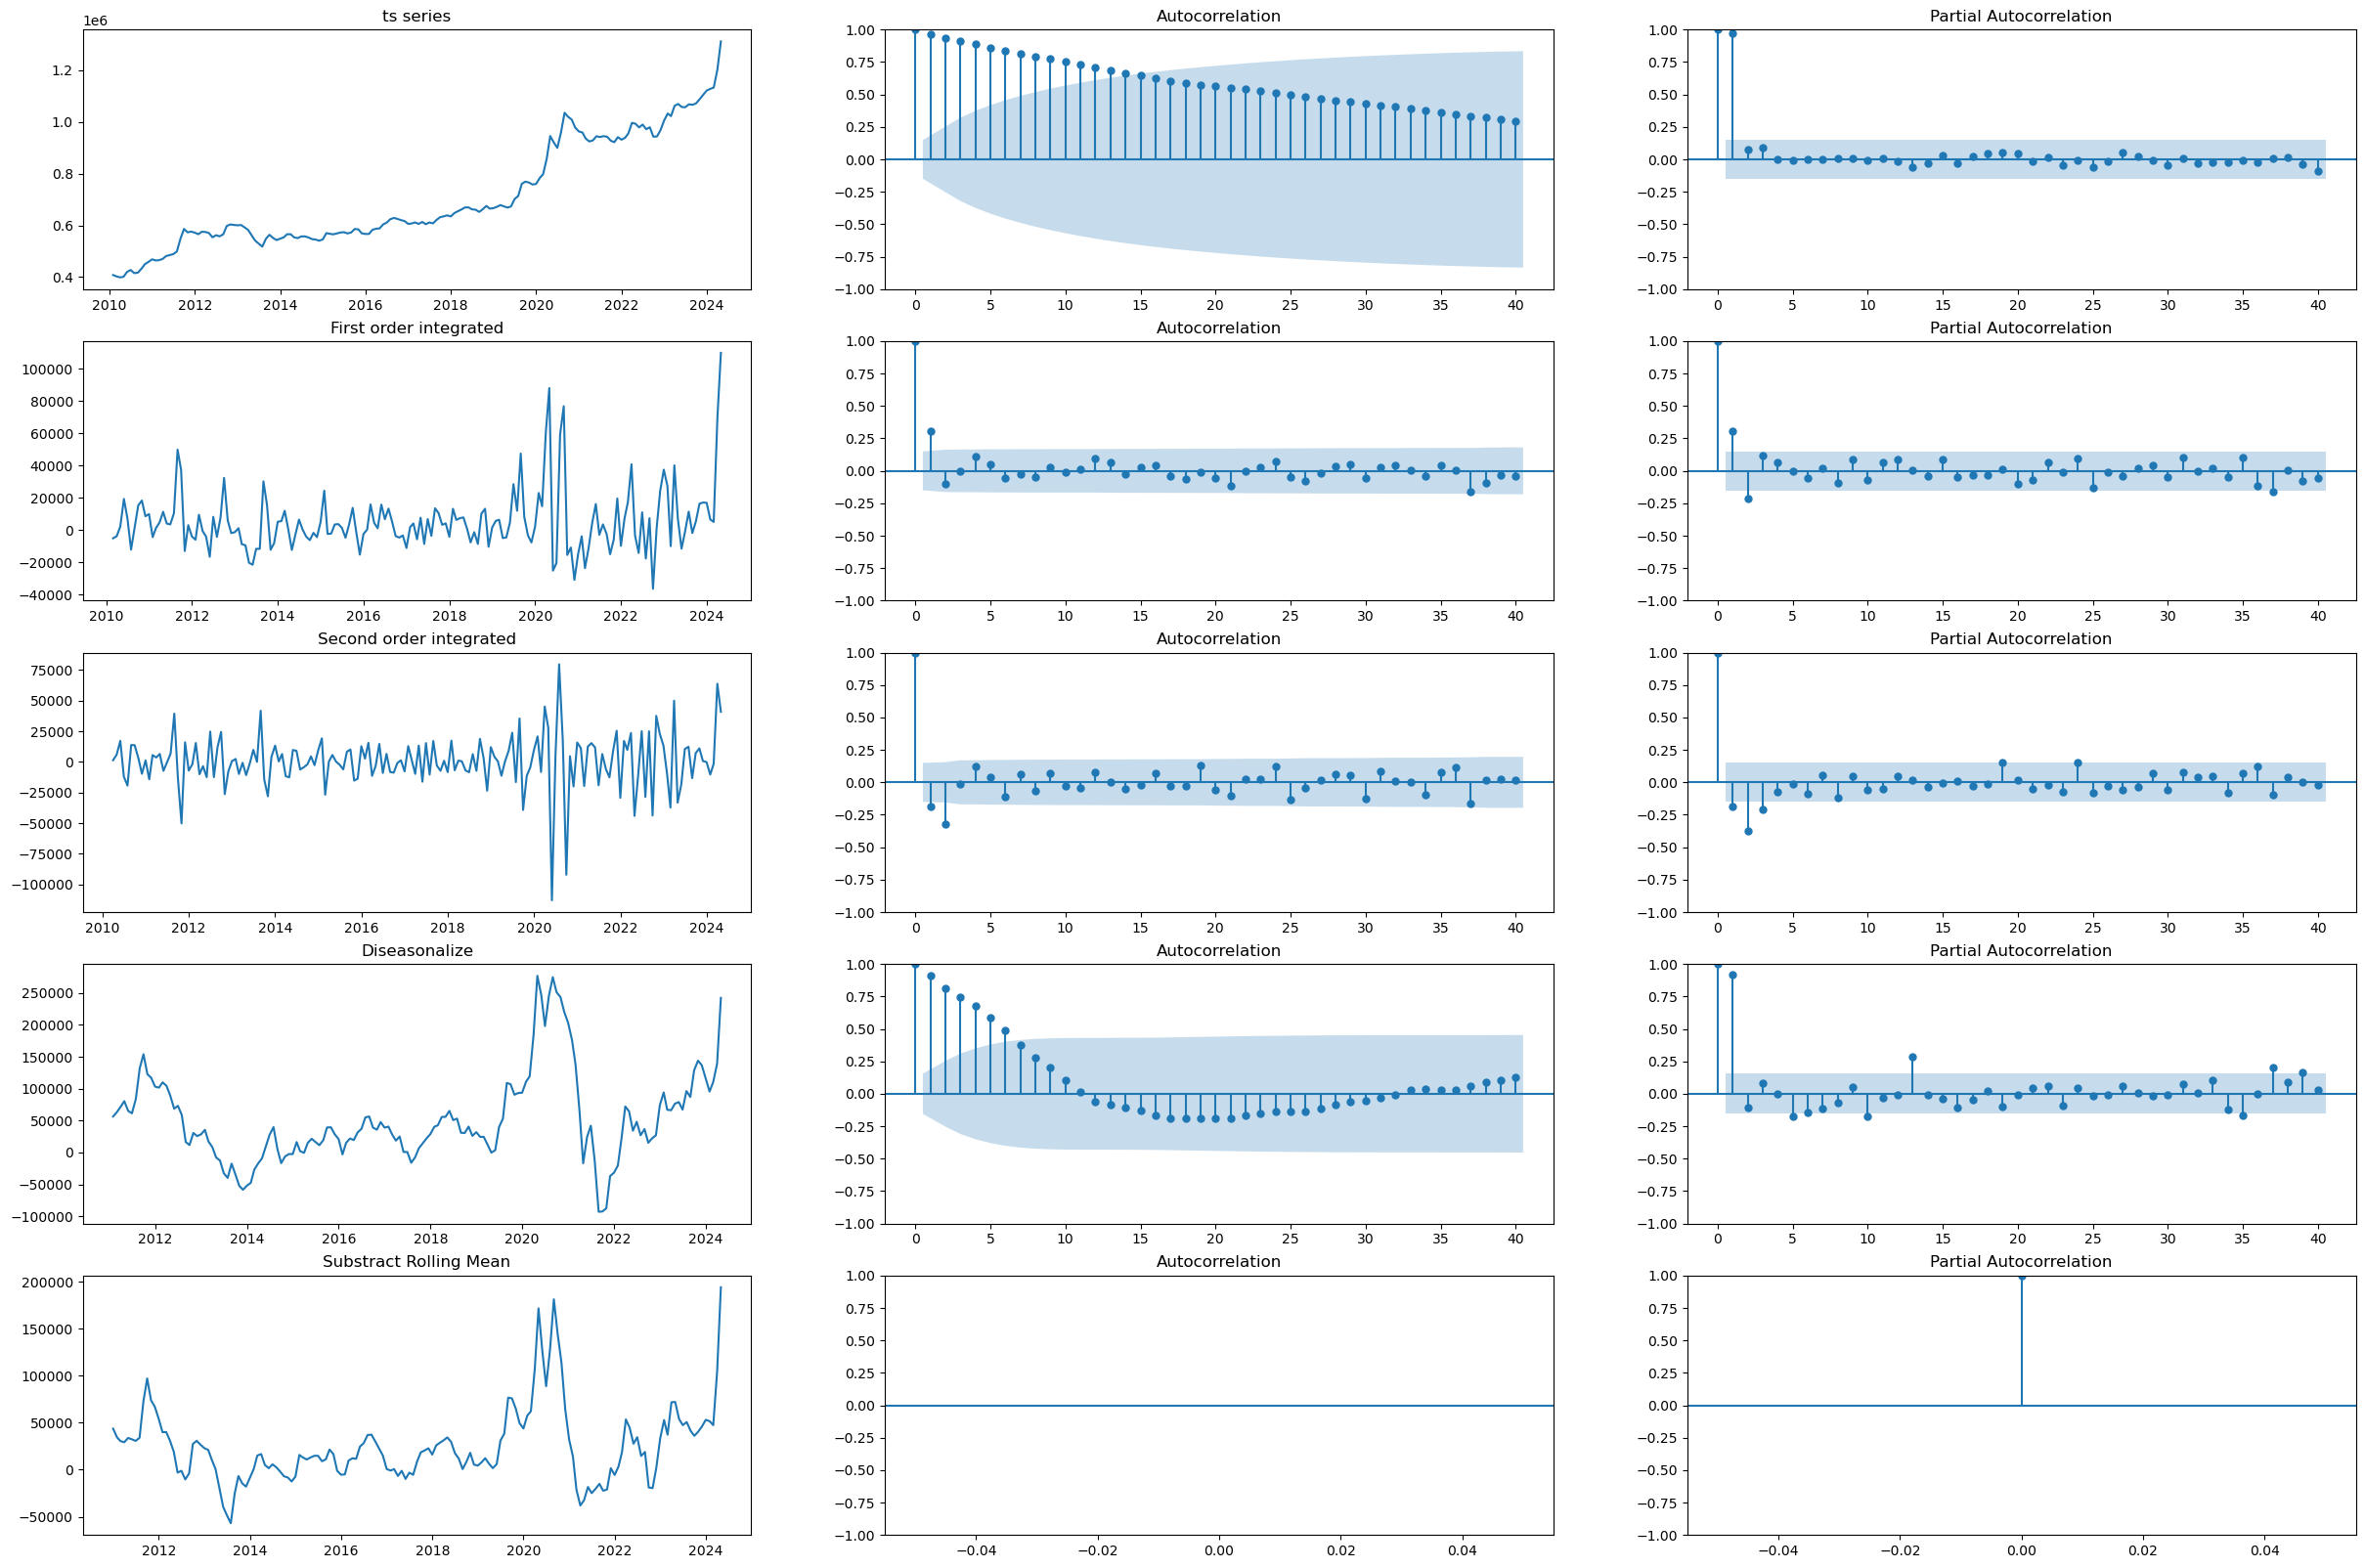

In [157]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20))

# plot original series
axes[0,0].plot(ts)
axes[0,0].set_title("ts series")
print(plot_acf(ts, ax=axes[0,1], lags=40))
print(plot_pacf(ts, ax=axes[0,2], lags=40))

# plot first order integrated series
axes[1,0].plot(first_ord_diff)
axes[1,0].set_title("First order integrated")
print(plot_acf(first_ord_diff, ax=axes[1,1], lags=40))
print(plot_pacf(first_ord_diff, ax=axes[1,2], lags=40))

# plot first order integrated series
axes[2,0].plot(second_ord_diff)
axes[2,0].set_title("Second order integrated")
print(plot_acf(second_ord_diff, ax=axes[2,1], lags=40))
print(plot_pacf(second_ord_diff, ax=axes[2,2], lags=40))

# Deseasonalize series
axes[3,0].plot(diseasonalize)
axes[3,0].set_title("Diseasonalize")
print(plot_acf(diseasonalize, ax=axes[3,1], lags=40))
print(plot_pacf(diseasonalize, ax=axes[3,2], lags=40))

# Subtract Rolling Mean series
axes[4,0].plot(subt_roll_mean)
axes[4,0].set_title("Substract Rolling Mean")
print(plot_acf(subt_roll_mean, ax=axes[4,1], lags=40))
print(plot_pacf(subt_roll_mean, ax=axes[4,2], lags=40))

## Checking Stationarity

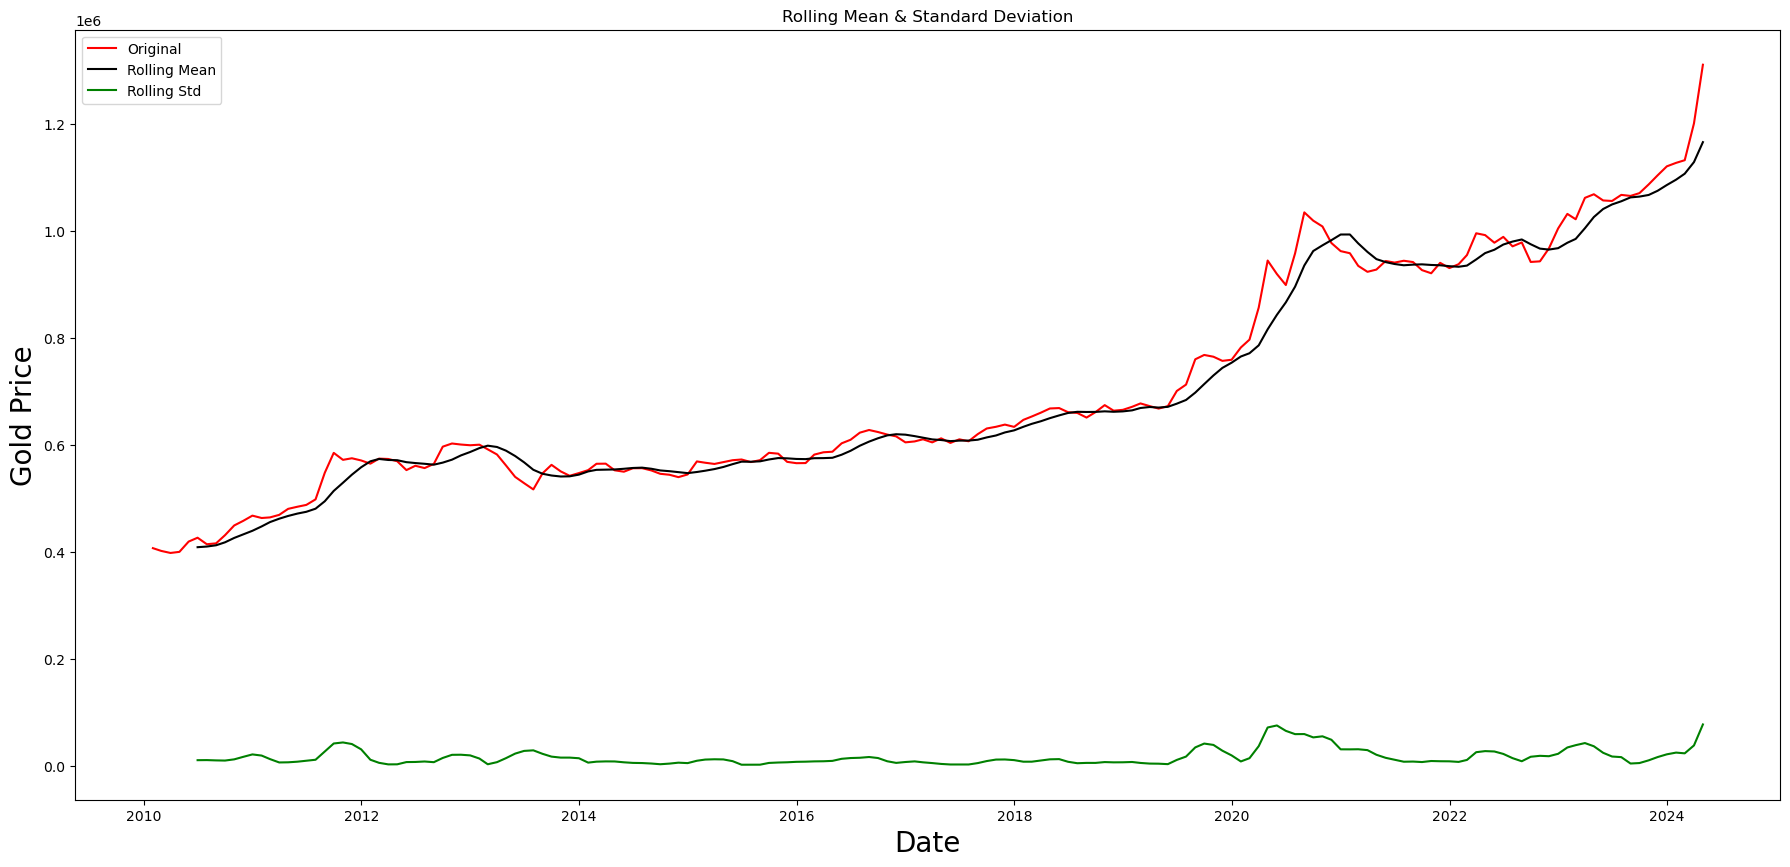

Test statistic:  1.7005026755883323
p-value:  0.9981298424985252
Critical Values: {'1%': -3.469648263987657, '5%': -2.878798906308495, '10%': -2.5759713094779593}


In [158]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    
    # Plotting
    plt.figure(figsize=(22, 10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Gold Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std), and adfuller test
check_mean_std(ts)
check_adfuller(ts)


Our initial criterion for stationarity is a _constant mean_. However, our data fails this criterion as depicted by the non-constant mean evident from the plot (shown by the black line). Consequently, our data is deemed non-stationary.

The second criterion concerns constant variance, which appears to be satisfied in our case. Hence, our data meets this condition for stationarity.

Lastly, if the test statistic is lower than the critical value, we can conclude that the time series is stationary. Upon examination, we find that the test statistic is 1.2, whereas the critical values are as follows: {'1%', '5%', '10%'}. Since the test statistic exceeds the critical values, our time series is not stationary.

In summary, based on the above analyses, it is evident that our time series data is not stationary. Consequently, in the subsequent section, we will explore methods to transform the time series into a stationary form.

## Checking Normality

In [159]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

In [160]:
normal_args = (np.mean(ts),np.std(ts))

print(is_normal(shapiro(ts)))
print(is_normal(normaltest(ts)))
print(is_normal(normal_ad(ts)))
print(is_normal(kstest_normal(ts)))

Not Normal
Not Normal
Not Normal
Not Normal
